In [37]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [38]:
# set the figure size
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [39]:
# Load the penguin dataset
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [40]:
# remove NA
penguins = penguins.dropna()
penguins.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

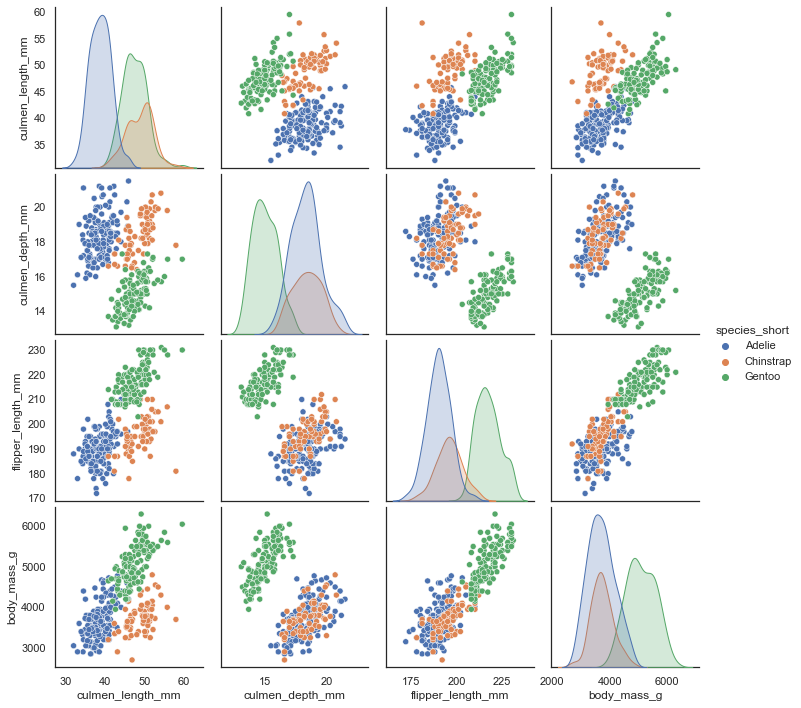

In [41]:
sns.pairplot(penguins, hue='species_short')
# Four dimensions is low enough that we can (sort of) reconstruct what the full dimensional data looks like in our heads.

In [42]:
import umap

In [43]:
reducer = umap.UMAP()

In [44]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [45]:
# we need to train our reducer, letting it learn about the manifold. 
# For this UMAP follows the sklearn API and has a method fit which we pass the data we want the model to learn from. 
# @e are going to want to reduced representation of the data we will use, 
# instead, the fit_transform method which first calls fit and then returns the transformed data as a numpy array.
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape # Here we only have two features

(334, 2)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

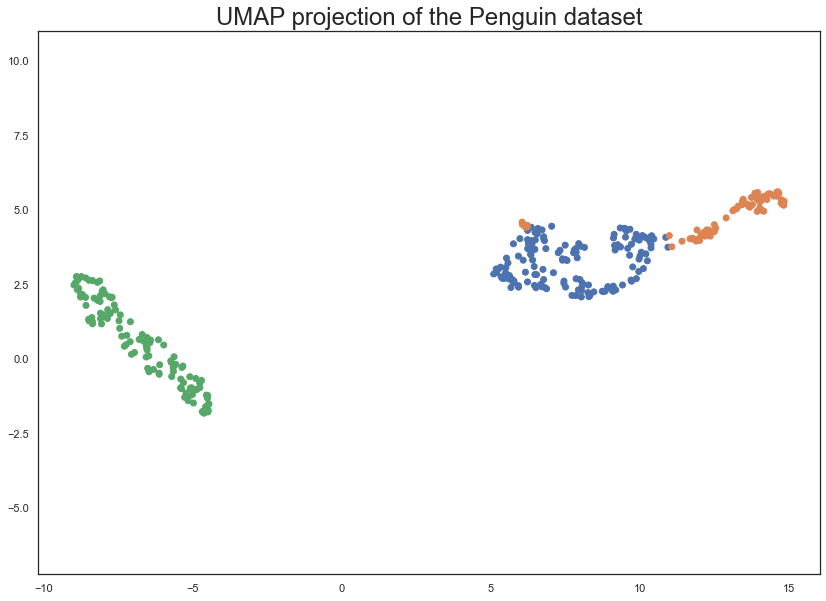

In [46]:
# we can plot the embedding as a standard scatterplot and color by the target array 
# (since it applies to the transformed data which is in the same order as the original).
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

In [47]:
# A digits dataset with 64 features
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

These are quite low resolution images – for the most part they are recognisable as digits, 
but there are a number of cases that are sufficiently blurred as to be questionable even for a human to guess at. 
The zeros do stand out as the easiest to pick out as notably different and clearly zeros. 
Beyond that things get a little harder: some of the squashed thing eights look awfully like ones, 
some of the threes start to look a little like crossed sevens when drawn badly, and so on.

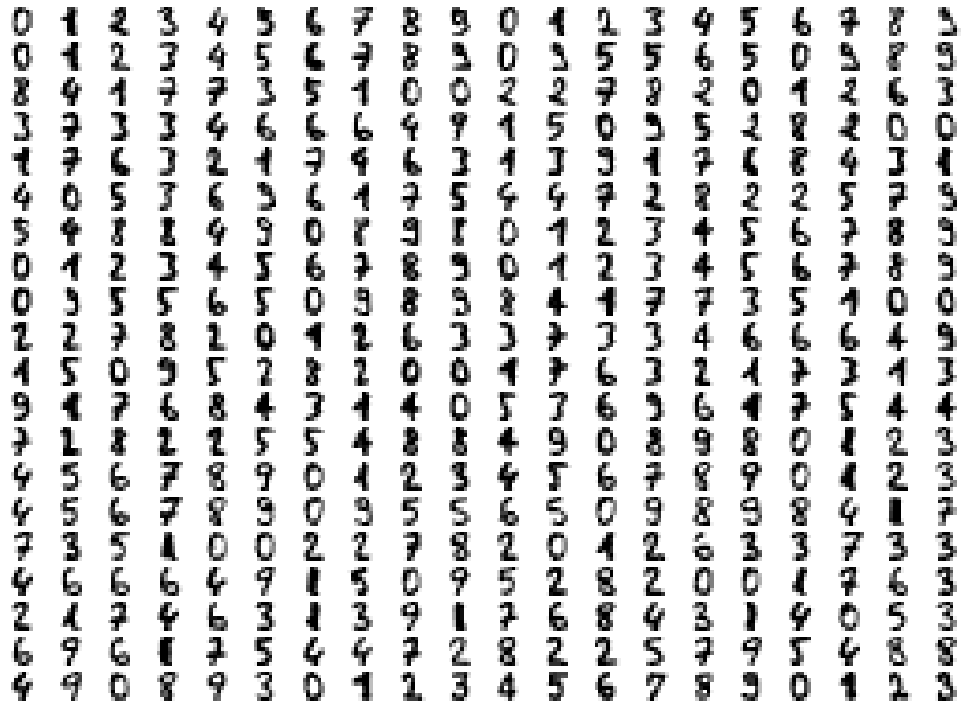

In [48]:
# plotting an image into each one in turn.
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

At least in principle 64 dimensions is overkill for this task, 
and we would reasonably expect that there should be some smaller number of “latent” features that would be sufficient
to describe the data reasonably well. We can try a scatterplot matrix – 
in this case just of the first 10 dimensions so that it is at least plottable, 
but as you can quickly see that approach is not going to be sufficient for this data.

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

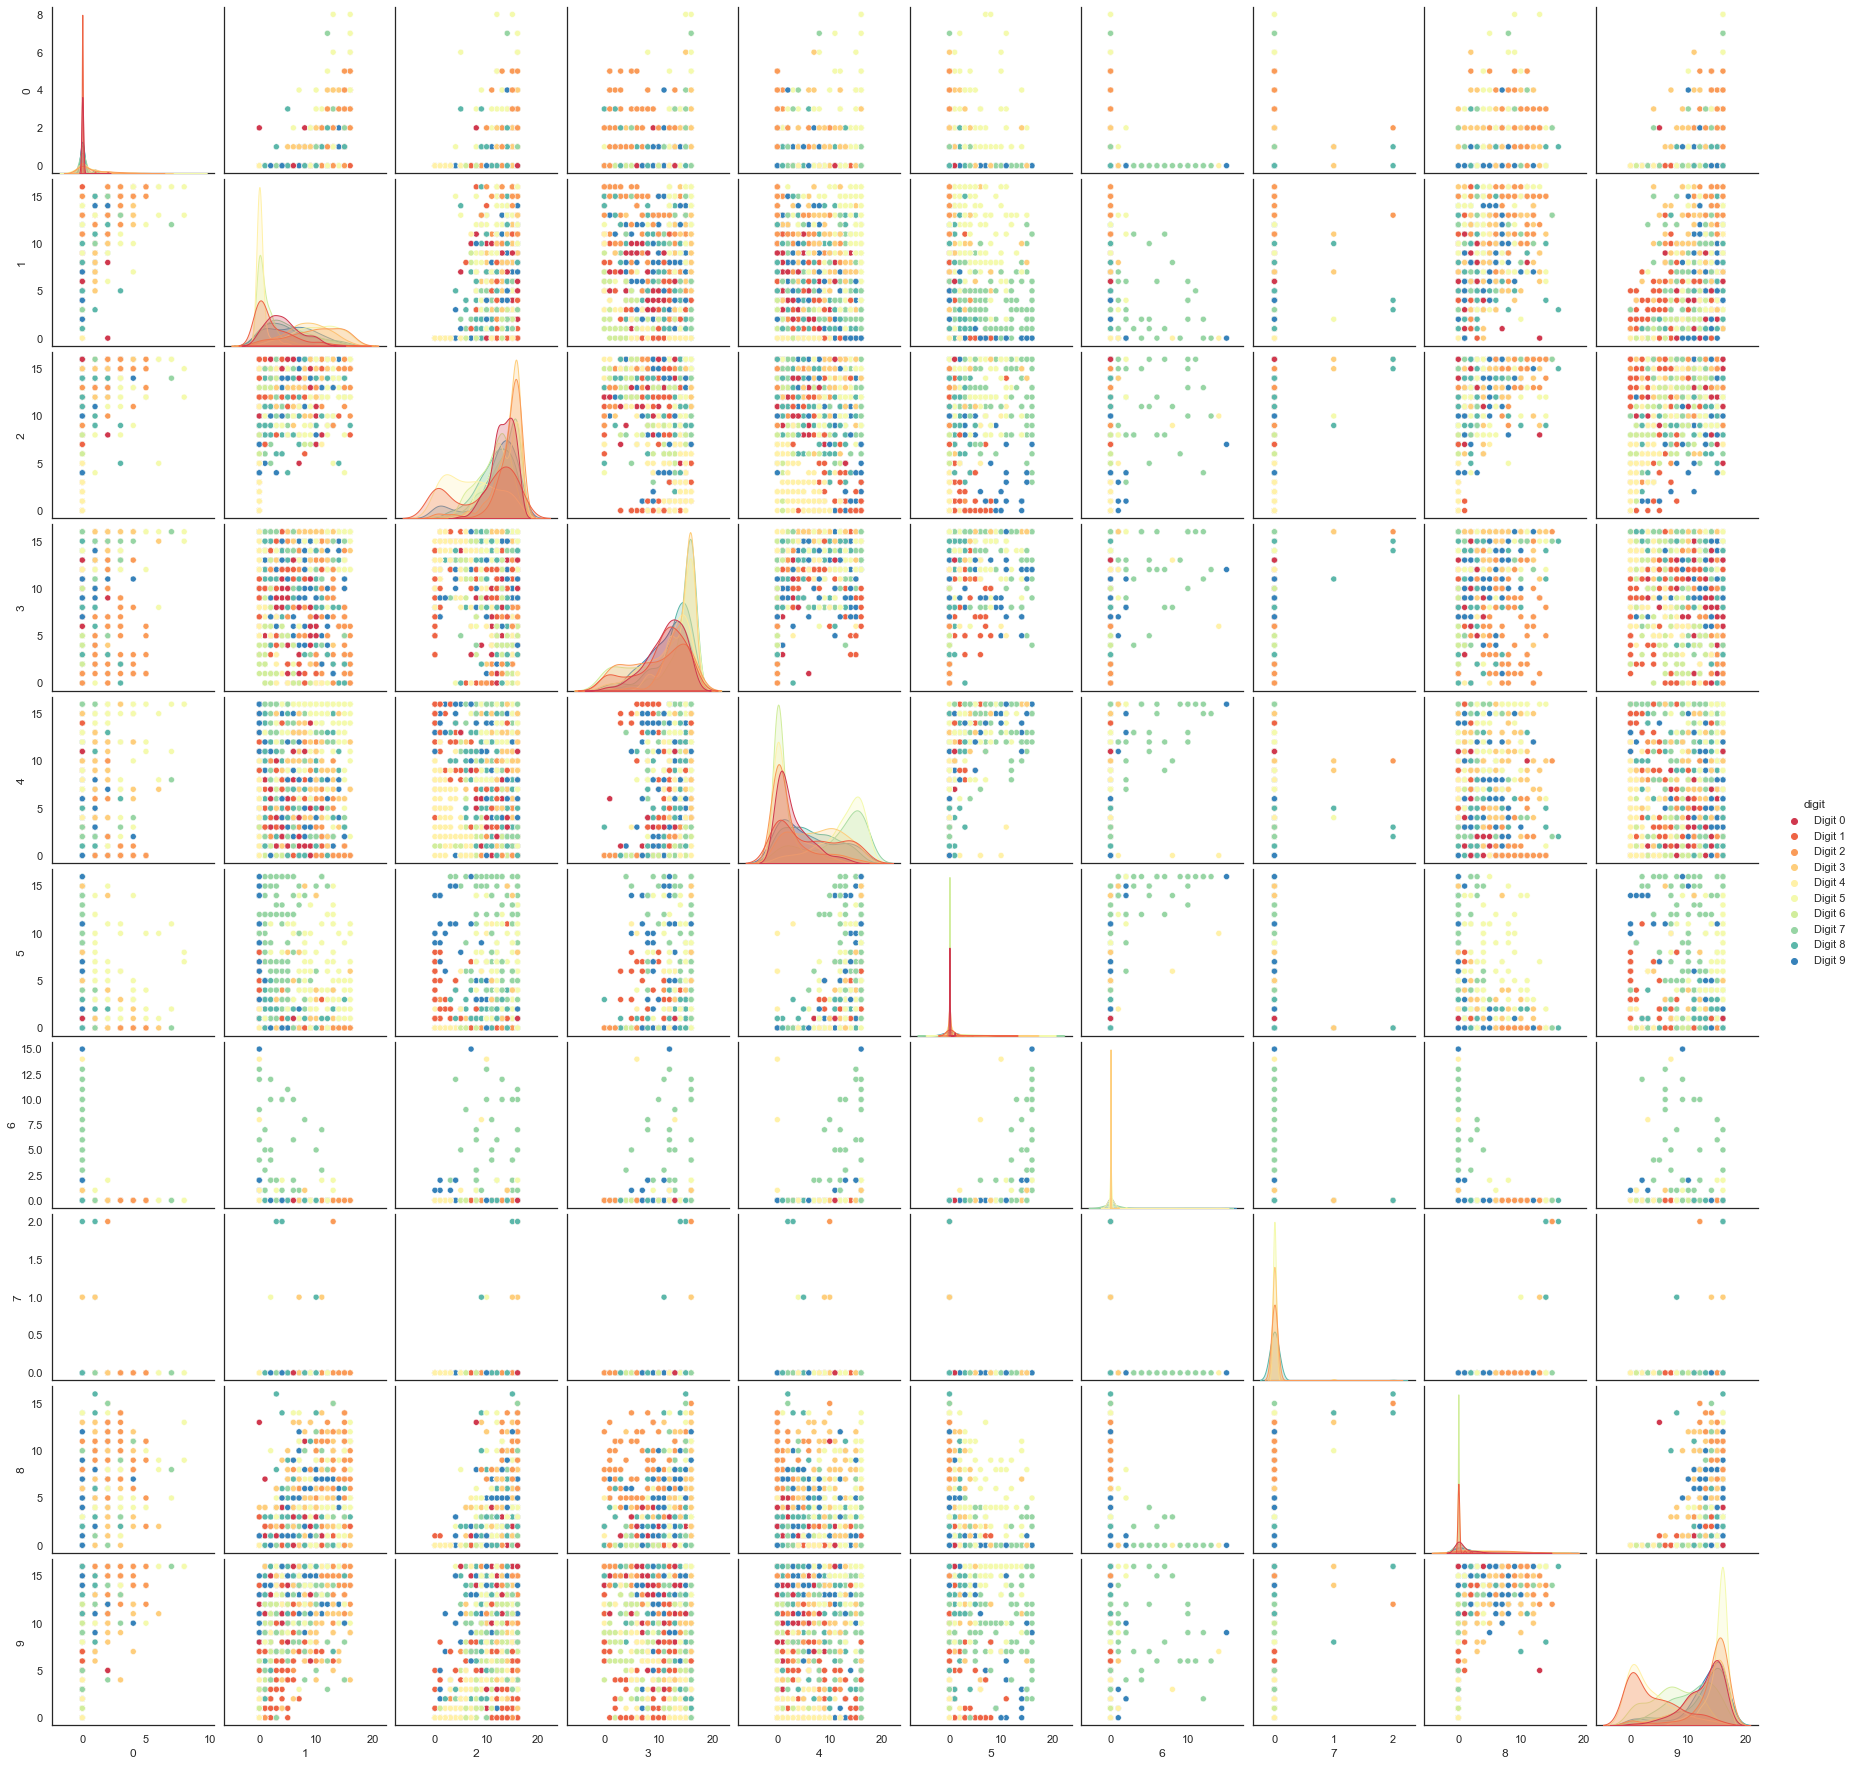

In [34]:
digits_df = pd.DataFrame(digits.data[:,1:11])
digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
sns.pairplot(digits_df, hue='digit', palette='Spectral')

In contrast we can try using UMAP again. It works exactly as before: construct a model, train the model, and then look at the transformed data. To demonstrate more of UMAP we’ll go about it differently this time and simply use the fit method rather than the fit_transform approach we used for Penguins.

In [49]:
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [51]:
# UMAP(a=None, angular_rp_forest=False, b=None,
#      force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
#      local_connectivity=1.0, low_memory=False, metric='euclidean',
#      metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
#      n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
#      output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
#      set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
#      target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
#      transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

TypeError: 'module' object is not callable

Now, instead of returning an embedding we simply get back the reducer object, now having trained on the dataset we passed it. To access the resulting transform we can either look at the embedding_ attribute of the reducer object, or call transform on the original data.

In [52]:
embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1797, 2)

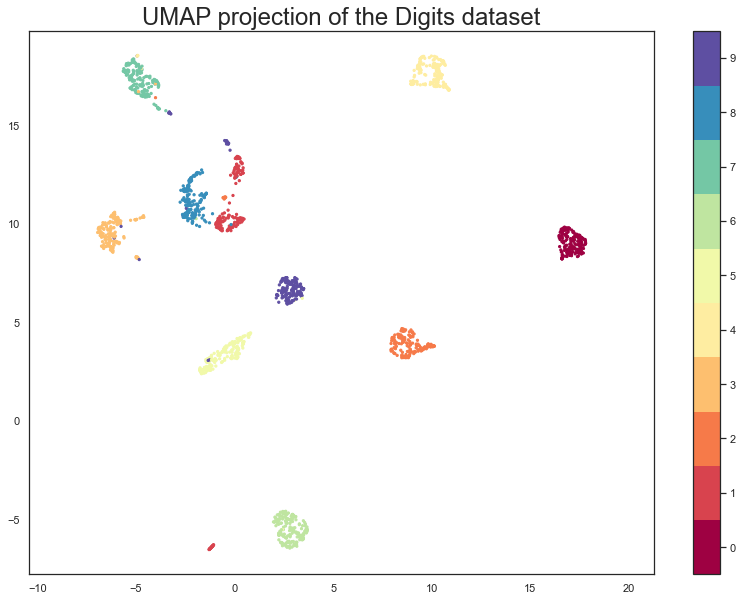

In [53]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);


As can be seen, the nines that blend between the ones and the sevens are odd looking nines (that aren’t very rounded) and do, indeed, interpolate surprisingly well between ones with hats and crossed sevens. In contrast the small disjoint cluster of ones at the bottom of the plot is made up of ones with feet (a horizontal line at the base of the one) which are, indeed, quite distinct from the general mass of ones.

